## Importing Libraries 

Importing necessary libraries: Pandas for data manipulation, NumPy for numerical operations, Matplotlib for plotting, Keras for building neural networks, Seaborn for statistical data visualization, and Plotly Express for interactive visualizations.
Loading historical stock data from a CSV file into a Pandas DataFrame (df).

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import seaborn as sns
import plotly.express as px

## Loading Dataset 

In [81]:
gd=pd.read_csv("D:\\GOOGLE.STOCK.CSV")
gd.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-03,56.157001,56.232498,55.183250,55.321499,55.321499,39824000
1,2018-12-04,55.155998,55.221001,52.499001,52.541000,52.541000,46904000
2,2018-12-06,51.713001,53.560001,51.538502,53.436501,53.436501,55384000
3,2018-12-07,53.000500,53.763000,51.424999,51.828999,51.828999,42024000
4,2018-12-10,51.752499,52.422501,51.164501,51.977501,51.977501,36154000


## Plotting Historical Close Prices
Using Plotly Express to create an interactive line plot of historical close prices over time.
Customizing the plot layout with titles for the x-axis, y-axis, and the overall plot.

In [82]:
fig=px.line(gd,x=gd.Date,y=gd.Close)
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Close Price',
    title='Close price over the years'
)
fig.show()

In [83]:
df1=gd.Close
df1

0        55.321499
1        52.541000
2        53.436501
3        51.828999
4        51.977501
           ...    
1253    138.050003
1254    138.619995
1255    136.399994
1256    133.919998
1257    133.320007
Name: Close, Length: 1258, dtype: float64

## Data Scaling and Splitting
Using MinMaxScaler to scale the closing prices between 0 and 1.
Splitting the scaled data into training and testing sets. 66% of the data is used for training, and the remaining 34% for testing.

In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
train_size=int(len(df1)*0.66)
test_size=len(df1)-train_size
train_data,test_data=df1[0:train_size,:],df1[train_size:len(df1),:1]
train_size,test_size

(830, 428)

In [85]:
train_data

array([[0.0638923 ],
       [0.03660522],
       [0.04539343],
       [0.02961783],
       [0.03107519],
       [0.03706158],
       [0.04291544],
       [0.04204204],
       [0.03232643],
       [0.01977957],
       [0.02575615],
       [0.02295923],
       [0.01628589],
       [0.00162908],
       [0.        ],
       [0.03103102],
       [0.03319986],
       [0.02986319],
       [0.02914187],
       [0.03416651],
       [0.01954896],
       [0.04636498],
       [0.04522657],
       [0.0490981 ],
       [0.04830322],
       [0.04617851],
       [0.03973091],
       [0.03359732],
       [0.04952499],
       [0.05139943],
       [0.05578125],
       [0.05988338],
       [0.04627176],
       [0.04874972],
       [0.04793027],
       [0.05631611],
       [0.04605587],
       [0.04141393],
       [0.05536908],
       [0.06876975],
       [0.06601206],
       [0.07683171],
       [0.08330388],
       [0.06821037],
       [0.06010422],
       [0.05831319],
       [0.05828867],
       [0.071

## LSTM Input Sequence Creation
Defining a function create_dataset to create input sequences for the LSTM model.
The function takes a dataset and a time step as parameters and generates input sequences (dataX) and corresponding target values (dataY).
Reshaping the input sequences for compatibility with the LSTM model.


In [86]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [87]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(ytest.shape)

(729, 100)
(729,)
(327, 100)
(327,)


(None, None)

In [88]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## LSTM Model Definition
Building a sequential LSTM model using Keras.
The model consists of three LSTM layers with 50 units each, followed by a Dense layer with one output unit.
Compiling the model with mean squared error as the loss function and the Adam optimizer.

In [89]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

C:\Users\ankit\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                      │ (None, 100, 50)               │      10,400 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ lstm_10 (LSTM)                     │ (None, 100, 50)               │      20,200 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ lstm_11 (LSTM)                     │ (None, 50)                    │      20,200 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_3 (Dense)                    │ (None, 1)                     │          51 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

## Model Training
Training the LSTM model using the training data (X_train and y_train).
Validating the model on the testing data (X_test and y_test).
The model is trained for 100 epochs with a batch size of 64.

In [90]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 241ms/step - loss: 0.1603 - val_loss: 0.0160
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - loss: 0.0155 - val_loss: 0.0121
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - loss: 0.0054 - val_loss: 0.0041
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - loss: 0.0021 - val_loss: 0.0035
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - loss: 0.0019 - val_loss: 0.0037
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - loss: 0.0015 - val_loss: 0.0036
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - loss: 0.0016 - val_loss: 0.0033
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - loss: 0.0016 - val_loss: 0.0033
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - loss: 0.0015 - val_loss: 0.0036
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - loss: 0.0016 - val_loss: 0.0034
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - loss: 0.0014 - val_loss: 0.0033
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 

## Model Prediction and Inverse Scaling
Using the trained LSTM model to make predictions on both the training (train_predict) and testing (test_predict) datasets.
Inverse-transforming the predicted values to the original scale for better interpretation.

In [91]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [92]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

## RMSE Calculation
Calculating and printing the Root Mean Squared Error (RMSE) for both the training and testing sets.
RMSE is a measure of the model's accuracy in predicting the stock prices.

In [93]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

96.5570132602967

In [94]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

112.84925359970657

## Plotting Predictions
Plotting the original closing prices (scaler.inverse_transform(df1)), along with the predicted prices for both the training and testing sets (trainPredictPlot and testPredictPlot, respectively).
Visualizing how well the LSTM model aligns with the actual stock price data.

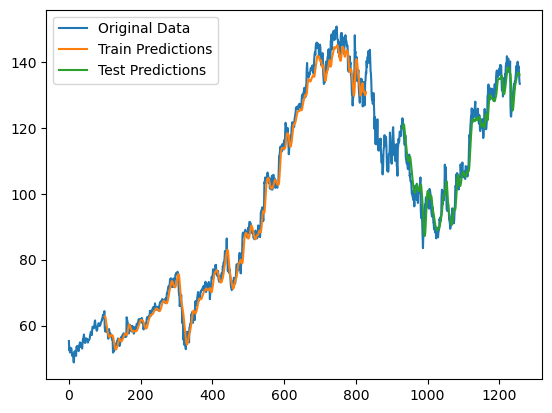

In [95]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1), label='Original Data')
plt.plot(trainPredictPlot, label='Train Predictions')
plt.plot(testPredictPlot, label='Test Predictions')
plt.legend()
plt.show()


In [96]:
x_input=test_data[328:].reshape(1,-1)
x_input.shape

(1, 100)

In [97]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.7460303612046394,
 0.7545682619341719,
 0.7482874810917534,
 0.738670059654459,
 0.7259121741929399,
 0.6940175341421572,
 0.7016722379406096,
 0.7170797927052522,
 0.7260103311744129,
 0.7934307228152732,
 0.7954915189257051,
 0.8263066480824613,
 0.827288080504898,
 0.8153153036891331,
 0.7834206636383506,
 0.7846964983090591,
 0.7824392312159144,
 0.8158060199003515,
 0.8148245874779151,
 0.7982393550240373,
 0.7988283067266119,
 0.7984356689869837,
 0.814726509006325,
 0.7994171014094201,
 0.7880331389039349,
 0.801281740576672,
 0.7782194035036941,
 0.7862665880220082,
 0.7937251152498096,
 0.8282695129273342,
 0.8008891028370438,
 0.8035388506500504,
 0.8143338712666969,
 0.8506448100124125,
 0.8647764712239344,
 0.8688983676705958,
 0.8635007837592571,
 0.862617586828177,
 0.8494670636270295,
 0.8576124836367002,
 0.867426219036941,
 0.8727257146629542,
 0.8563367961720231,
 0.8703703690982195,
 0.8849928839132551,
 0.8782213868596184,
 0.8846984914787187,
 0.8834226568080107

## Future Stock Price Prediction and Visualization
Future Prediction Loop:

Assuming we have a trained LSTM model (model), this part generates predictions for the next 30 days.
The loop iterates through the prediction process for each day, extending the input sequence (temp_input) with the predicted values.


In [98]:

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.83806163]
101
1 day input [0.75456826 0.74828748 0.73867006 0.72591217 0.69401753 0.70167224
 0.71707979 0.72601033 0.79343072 0.79549152 0.82630665 0.82728808
 0.8153153  0.78342066 0.7846965  0.78243923 0.81580602 0.81482459
 0.79823936 0.79882831 0.79843567 0.81472651 0.7994171  0.78803314
 0.80128174 0.7782194  0.78626659 0.79372512 0.82826951 0.8008891
 0.80353885 0.81433387 0.85064481 0.86477647 0.86889837 0.86350078
 0.86261759 0.84946706 0.85761248 0.86742622 0.87272571 0.8563368
 0.87037037 0.88499288 0.87822139 0.88469849 0.88342266 0.84181236
 0.81011404 0.80903452 0.81806314 0.79136977 0.81109548 0.82748439
 0.81492282 0.84750435 0.82915271 0.85829951 0.85555168 0.88244122
 0.88999784 0.88705369 0.91158803 0.89775062 0.88096922 0.89971349
 0.90462035 0.88783881 0.88489466 0.86291198 0.8742958  0.89608231
 0.7640876  0.73238927 0.73199672 0.75505898 0.75064283 0.77291998
 0.78283187 0.80039839 0.81099724 0.82032026 0.82876008 0.81335259
 0.8366111  0.83248934 0.85005587 0

## Visualization of Future Predictions:
day_new represents the last 100 days of historical data, and day_pred is the range for the next 30 days. The plot displays the original closing prices for the last 100 days (scaler.inverse_transform(df1[-100:])) and overlays the predicted prices for the next 30 days (scaler.inverse_transform(lst_output)).


In [99]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

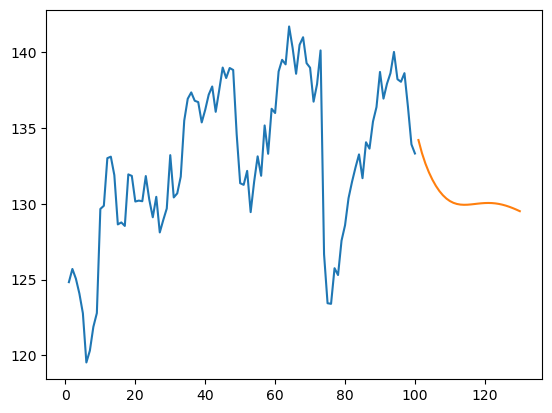

In [100]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [101]:
len(df1)

1258

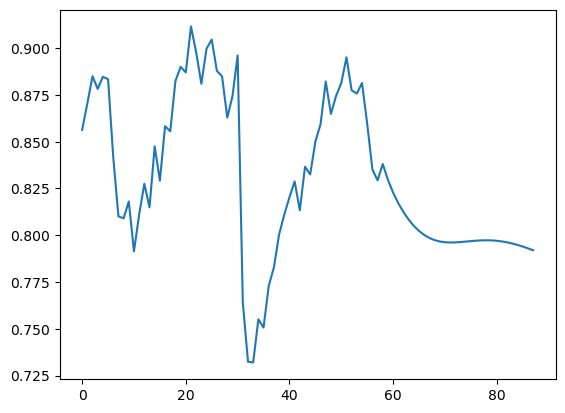

In [102]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [103]:
df3=scaler.inverse_transform(df3).tolist()

fig=px.line(scaler.inverse_transform(df3),labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(xaxis_title="Days",
                  yaxis_title='Close prices',
                  title="Stock Close price over time with 30 days prediction")
fig.update_traces(showlegend=False)

fig.show()